In [1]:
# Movie Correlation Project
# In this project I will use movie collect from 1980 to 2020 see what features of this data if any correlate to a higher gross earnings

In [2]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create


# Read in the data

df = pd.read_csv(r'/Users/cameronchenault/Documents/Main Files/Portfolio/Python_portfolio/movies.csv')

In [3]:
# First looking at the data


df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Now checking for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
# Removing rows with missing data

df = df.dropna()

In [6]:
# Checking data types for the columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# Updating data types of budget and gross to show values as whole dollars (ints)

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


In [8]:
# Years and released dates don't match po completely I'll create a new column for the correct release year

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


In [9]:
# Sorting data to show the highest gross

df = df.sort_values(by = ['gross'], inplace = False, ascending = False)

In [10]:
#Dropping any duplicates that are in the data

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


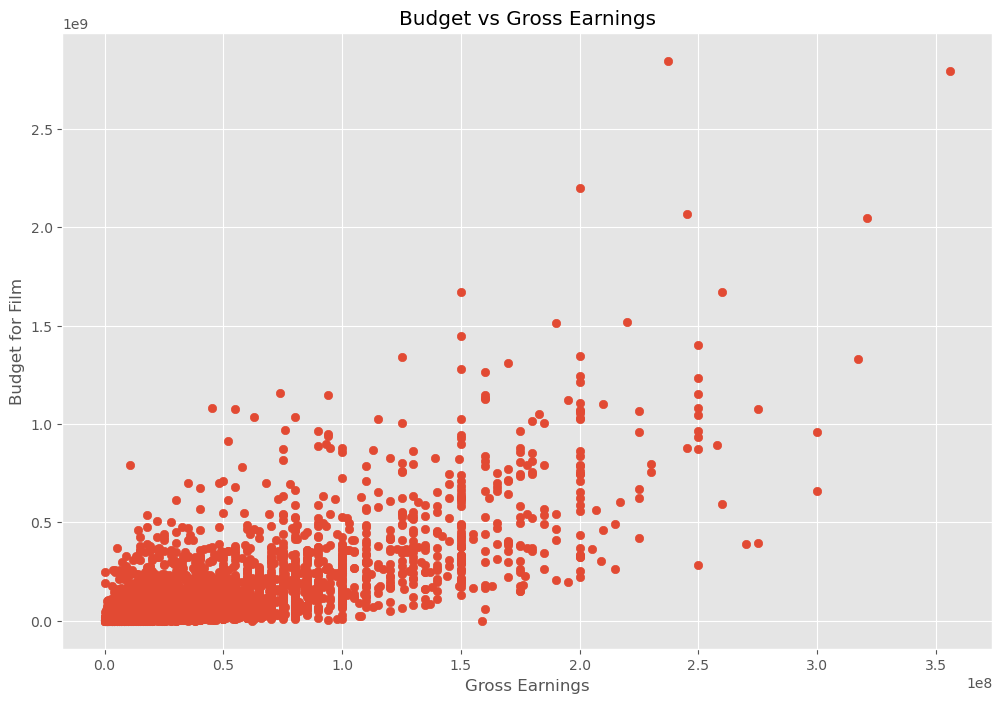

In [11]:
# Scatter plot with bidget vs gross

plt.scatter(x=df['budget'], y=df['gross'] )

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()

In [12]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


<Axes: xlabel='budget', ylabel='gross'>

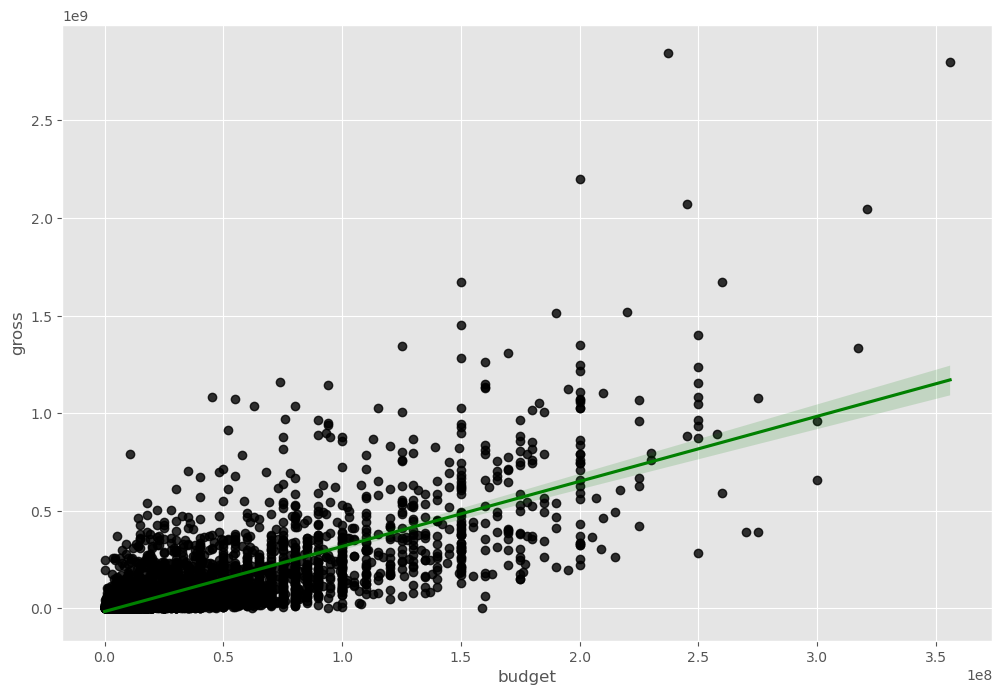

In [13]:
# Plot the budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws= {'color':'black'}, line_kws={'color':'green'})

In [14]:
# Now looking at correlation

df.corr(method='pearson')

/var/folders/yn/315_tckj3hsc6nybn142zzlm0000gn/T/ipykernel_52990/2929796388.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


/var/folders/yn/315_tckj3hsc6nybn142zzlm0000gn/T/ipykernel_52990/4008655798.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


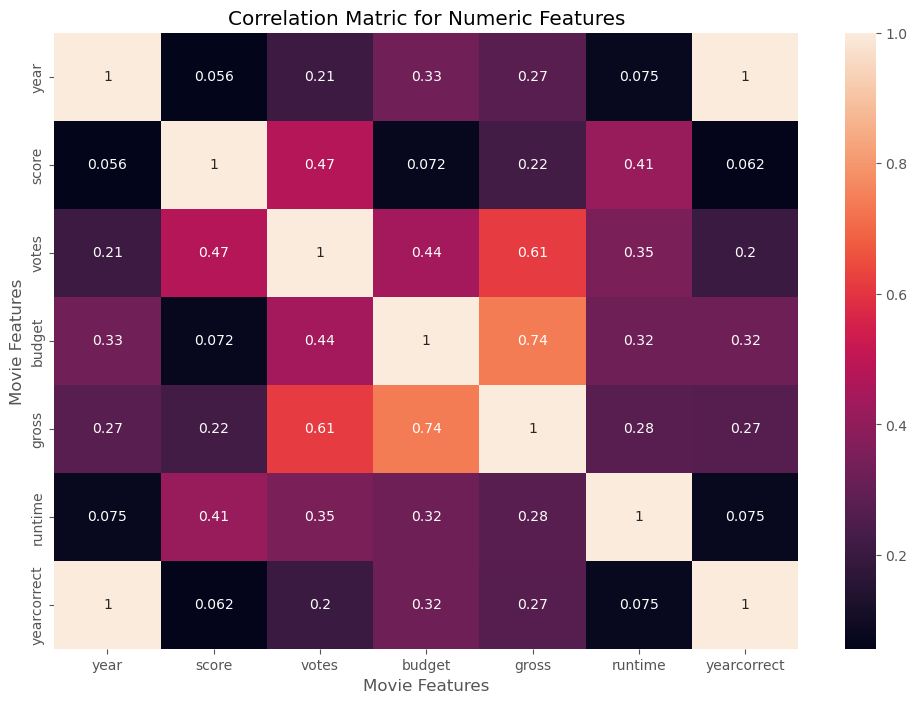

In [15]:
# Creating a heat map

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [16]:
# After examining correlation data you can see that a moveis votes and budget have the highest correlation to the to gross earnings of the movie